# 1.Import Data

In [1]:
import numpy as np
import pickle
import sklearn
from tqdm import tqdm
import pandas as pd

In [2]:
y_name={
    "y_train":"train_y",
    "y_test":"test_y"
}

In [3]:
def open_pkl(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=data
    return all_data

In [4]:
y_data = open_pkl(y_name)
y_train = y_data["y_train"]
y_test = y_data["y_test"]

In [5]:
y_train

array([0, 3, 0, ..., 0, 0, 0])

In [6]:
train_path = "DataSet\\train_df_tfidf_no2.csv"
train_df = pd.read_csv(train_path,sep=",")

test_path = "DataSet\\test_df_tfidf_no2.csv"
test_df = pd.read_csv(test_path,sep=",")

In [7]:
train_df.head()

,if,what,hmm,worri,know,do,s,not,am,are,...,heheheheh,roadsid,chiranjeevi,pawankalyan,drone,salaman,conphyooj,grasshopp,freeeeeeeeeeeeee,dilut
0,0.0,0.240166,0.0,12.260163,0.0,0.260674,0.506891,0.191955,0.266008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test_df.head()

,if,what,hmm,worri,know,do,s,not,am,are,...,heheheheh,roadsid,chiranjeevi,pawankalyan,drone,salaman,conphyooj,grasshopp,freeeeeeeeeeeeee,dilut
0,0.0,0.000000,9.70399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.600414,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.480331,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.400276,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_np = train_df.iloc[:, :].values
test_np = test_df.iloc[:,:].values

In [10]:
# in case I have more versions of dataset for better model building
X_train = dict()
X_test = dict()

X_train["train_baseline"]=train_np
X_test["test_baseline"]=test_np

In [11]:
X_test["test_baseline"]

array([[0.        , 0.        , 9.7039897 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.60041408, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.34309376, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# 2.Logistic Regression Model
## 2.1. build and fit model

In [12]:
from sklearn.linear_model import LogisticRegression
def lr_model(train_data,y_train):
    classifiers = dict()
    for key in tqdm(train_data.keys()):
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(train_data[key],y_train)
        classifiers[key]=classifier
    
    return classifiers

In [13]:
classifiers = lr_model(X_train,y_train)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:31<00:00, 31.49s/it]


In [14]:
# save model
def save_data(name,data):
    pickle_file = open('DataSet\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [15]:
# save model
save_data("LogisticRegression_baseline_delete2",classifiers)

## 2.2. prediction

In [16]:
# function for getting prediction
def get_prediction(classifiers, X_test):
    y_pred_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(X_test.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_pred_dict[list2[i]]=classifiers[list1[i]].predict(X_test[list2[i]])
        
    return y_pred_dict

In [17]:
y_preds = get_prediction(classifiers,X_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.71it/s]


In [18]:
# function for getting the score of each prediction
def get_scores(classifiers, X_test):
    y_score_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(X_test.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_score_dict[list2[i]]=classifiers[list1[i]].decision_function(X_test[list2[i]])
        
    return y_score_dict

In [19]:
y_scores = get_scores(classifiers, X_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.20it/s]


In [20]:
y_scores

{'test_baseline': array([[ 4.50436104, -8.82606663,  2.87492769,  1.4467779 ],
        [ 2.62426999, -1.25236319, -0.6003259 , -0.7715809 ],
        [ 1.00967189, -1.78743016, -1.37410713,  2.1518654 ],
        ...,
        [ 2.48284134, -1.09513865, -0.72142651, -0.66627618],
        [ 6.01224511, -2.68226149, -8.12768499,  4.79770137],
        [ 4.52291771, -1.79002508, -0.8025949 , -1.93029773]])}

In [21]:
# function for saving the predictions and scores
def save_prediction(name,data):
    pickle_file = open('Prediction\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [22]:
save_prediction("baseline_delete2_logisticregression_preds",y_preds)
save_prediction("baseline_delete2_logisticregression_scores",y_scores)

## 2.3. Evaluation: confusion matrix, accuracy, precision, recall, F1 measure

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# print evaluation result
def get_evaluation(y_test,y_pred):
    ev = dict()
    ev["confusion_matrix"]=confusion_matrix(y_test,y_pred)
    ev["accuracy"] = accuracy_score(y_test,y_pred)
    ev["precision_macro"]=precision_score(y_test,y_pred,average="macro")
    ev["precision_micro"]=precision_score(y_test,y_pred,average="micro")
    ev["precision_weighted"]=precision_score(y_test,y_pred,average="weighted")
    ev["recall_macro"]=recall_score(y_test,y_pred,average="macro")
    ev["recall_micro"]=recall_score(y_test,y_pred,average="micro")
    ev["recall_weighted"]=recall_score(y_test,y_pred,average="weighted")
    ev["F1_score_macro"]=f1_score(y_test,y_pred,average="macro")
    ev["F1_score_micro"]=f1_score(y_test,y_pred,average="micro")
    ev["F1_score_weighted"]=f1_score(y_test,y_pred,average="weighted")
    
    for key in ev.keys():
        if key !="confusion_matrix":
            print("{a} is: {b}".format(a=key, b=ev[key]))
        else:
            print(ev[key])
    
    return ev

    

In [24]:
#"macro": "Calculate metrics for each label, and find their unweighted mean. ",
#"micro": "Calculate metrics globally by counting the total true positives, false negatives and false positives."
#"weighted":"Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). "

def get_evaluation_all(y_test, y_pred_dict):
    for key in tqdm(y_pred_dict.keys()):
        print("evaluation on data {0}".format(key))
        get_evaluation(y_test, y_pred_dict[key])
        print("***************************************")
    

In [25]:
get_evaluation_all(y_test,y_preds)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.81it/s]

evaluation on data test_baseline
[[3862  270  274  271]
 [ 124  126   12   22]
 [  85   14  134   17]
 [  65    8   15  210]]
accuracy is: 0.7863496097295335
precision_macro is: 0.4867699888377959
precision_micro is: 0.7863496097295335
precision_weighted is: 0.8440960903300961
recall_macro is: 0.6275257390140581
recall_micro is: 0.7863496097295335
recall_weighted is: 0.7863496097295335
F1_score_macro is: 0.5350238026210133
F1_score_micro is: 0.7863496097295335
F1_score_weighted is: 0.8081033354014999
***************************************


## 2.4. Evaluation: ROC curve, AUC

In [26]:
# in order to plot ROC curve and calculate AUC, I need to turn y label into 1 hot representation.
# transfer y label from {class:[0,1,2,3]} into {class: [1,0,0,0], [0,1,0,0],[0,0,1,0],[0,0,0,1]}
import tensorflow as tf
y_test1hot = tf.keras.utils.to_categorical(y_test,num_classes=4)

In [27]:
emotion = {"others":0,"happy":1,"sad":2,"angry":3}
print(y_test1hot[13])#3 - 4th
print(y_test1hot[0])#0 - 1st
print(y_test1hot[6])#1 - 2nd

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]


In [28]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [29]:
def compute_roc_auc(y_test1hot, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_class = 4
    
    # compute roc curve and auc based on each label
    for i in range(n_class):
        fpr[i],tpr[i],_ = roc_curve(y_test1hot[:,i],y_score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
    
    # compute roc curve and auc based on average type = "micro"
    fpr["micro"],tpr["micro"],_=roc_curve(y_test1hot.ravel(),y_score.ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    # compute roc curve and auc based on average type = "macro"
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_class):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        
    # Finally average it and compute AUC
    mean_tpr = mean_tpr/n_class
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"],tpr["macro"])
    
    return fpr, tpr, roc_auc

In [30]:
def compute_roc_auc_all(y_test1hot, y_scores):
    fprs=dict()
    tprs=dict()
    roc_aucs=dict()
    for key in tqdm(y_scores.keys()):
        fprs[key],tprs[key],roc_aucs[key]=compute_roc_auc(y_test1hot,y_scores[key])
    
    return fprs,tprs,roc_aucs

In [31]:
def plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "macro": "only show macro curve",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if (choose !="macro") and (choose !="label"):
        # draw the line of micro-average ROC curve
        plt.plot(fpr["micro"],tpr["micro"],
                 label="micro-average ROC (AUC: {0:0.2f})".format(roc_auc["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
    if (choose !="micro") and (choose !="label"):
        # draw the line of macro-average ROC curve
        plt.plot(fpr["macro"],tpr["macro"],
                 label="macro-average ROC (AUC: {0:0.2f})".format(roc_auc["macro"]),
                 color = 'navy',linestyle=':',lw=4)
        
    if (choose !="macro") and (choose !="micro"):    
        # draw line of each label
        for i in range(n_class):
            plt.plot(fpr[i],tpr[i],color=colors[i],lw=2,
                     label="ROC of class {0} {1} (AUC: {2:0.2f})"
                     "".format(i,label_name[i],roc_auc[i]))
    
    plt.plot([0,1],[0,1],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower right")
    plt.savefig("Pictures\\{a}\\SingleData\\ROC Curve by model {b}_{c} on data {d}_delete2.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [32]:
fprs,tprs,roc_aucs=compute_roc_auc_all(y_test1hot, y_scores)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.92it/s]


In [33]:
modelname="LogisticRegression"

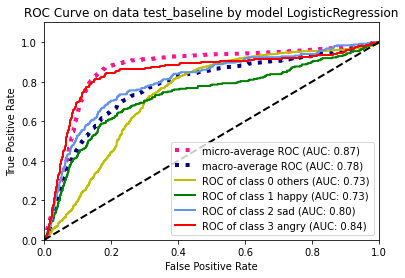

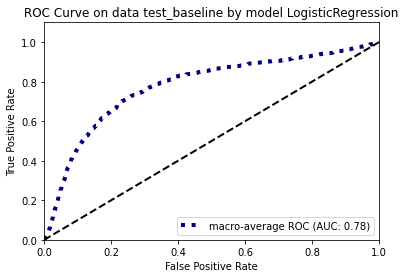

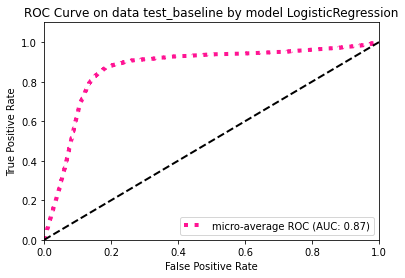

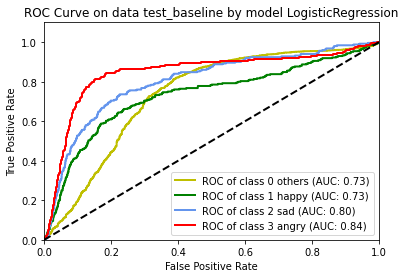

In [34]:
key_name = "test_baseline"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

## 2.5. Evaluation: P-R curve, average precision

In [35]:
def compute_p_r_curve(y_test1hot, y_score):
    n_class = 4
    precision = dict()
    recall = dict()
    average_precision =dict()
    
    # compute P-R curve on each label
    for i in range(n_class):
        precision[i],recall[i], _ = precision_recall_curve(y_test1hot[:,i],y_score[:,i])
        average_precision[i] = average_precision_score(y_test1hot[:,i],y_score[:,i])
        
    # compute P-R curve with average = "micro"
    precision["micro"],recall["micro"],_=precision_recall_curve(y_test1hot.ravel(),y_score.ravel())
    average_precision["micro"]=average_precision_score(y_test1hot,y_score,average="micro")
    
    return precision,recall,average_precision

In [36]:
def compute_p_r_curve_all(y_test1hot, y_scores):
    recalls=dict()
    precisions=dict()
    average_precisions=dict()
    for key in y_scores.keys():
        recalls[key],precisions[key],average_precisions[key]=compute_p_r_curve(y_test1hot,y_scores[key])
    
    return recalls,precisions,average_precisions
    

In [37]:
def plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if choose !="label":
        # draw the line of micro-average ROC curve
        plt.plot(recall["micro"],precision["micro"],
                 label="micro-average P-R curve (average precision: {0:0.2f})".format(average_precision["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
        
    if choose !="micro":    
        # draw line of each label
        for i in range(n_class):
            plt.plot(recall[i],precision[i],color=colors[i],lw=2,
                     label="P-R curve of class {0} {1} (average precision: {2:0.2f})"
                     "".format(i,label_name[i],average_precision[i]))
    
    plt.plot([0,1],[1,0],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('P-R Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower left")
    plt.savefig("Pictures\\{a}\\SingleData\\P-R Curve by model {b}_{c} on data {d}_delete2.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [38]:
recalls,precisions,average_precisions = compute_p_r_curve_all(y_test1hot, y_scores)

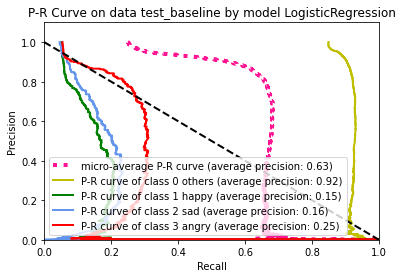

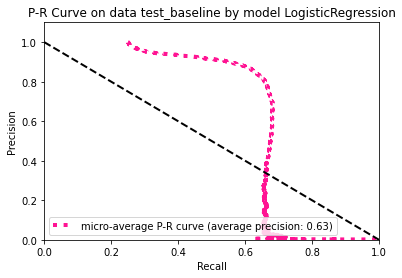

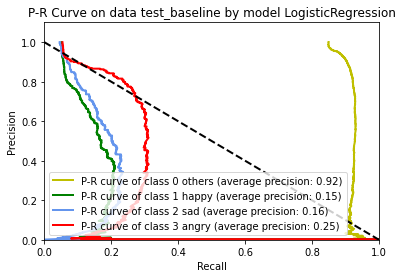

In [39]:
key_name="test_baseline"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

# 3. if just want to directly load the model

In [40]:
model_names = {
    "model_all":"LogisticRegression_baseline_delete2"
}

In [41]:
model_data = open_pkl(model_names)
classifiers = model_data